In [1]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
import pandas as pd
import os
import tarfile
import urllib.request

ts=pd.read_csv("Features_testset.csv")
tv=pd.read_csv("Features_trainvalidation.csv")

In [4]:
tv.head()

,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,maxdiff_Number,dev_Number,max_Number,...,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar,Index,TotalEnergy,Bandgap
0,1,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,0,0.000000,89,...,0.666667,0.0,0.333333,0.000000,0,0.000000,0.00000,1,-4.4803,0.0
1,1,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,0,0.000000,47,...,0.090909,0.0,0.909091,0.000000,0,0.000000,0.00000,5,-3.2681,0.0
2,2,0.745356,0.693361,0.670782,0.667408,0.666732,57.666667,32,14.222222,79,...,0.063830,0.0,0.638298,0.297872,0,0.088829,0.03948,9,-3.5294,0.0
3,2,0.745356,0.693361,0.670782,0.667408,0.666732,57.666667,32,14.222222,79,...,0.063830,0.0,0.638298,0.297872,0,0.088829,0.03948,13,-3.5643,0.0
4,2,0.745356,0.693361,0.670782,0.667408,0.666732,57.666667,32,14.222222,79,...,0.063830,0.0,0.638298,0.297872,0,0.088829,0.03948,17,-3.4825,0.0


In [5]:
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44174 entries, 0 to 44173
Columns: 148 entries, NComp to Bandgap
dtypes: float64(97), int64(51)
memory usage: 49.9 MB


In [6]:
tv.describe()

,NComp,Comp_L2Norm,Comp_L3Norm,Comp_L5Norm,Comp_L7Norm,Comp_L10Norm,mean_Number,maxdiff_Number,dev_Number,max_Number,...,frac_sValence,frac_pValence,frac_dValence,frac_fValence,CanFormIonic,MaxIonicChar,MeanIonicChar,Index,TotalEnergy,Bandgap
count,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,...,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000,44174.000000
mean,2.921968,0.649572,0.584268,0.551721,0.543117,0.538253,39.136690,40.279486,14.351893,61.749264,...,0.225878,0.132151,0.439213,0.202758,0.215715,0.286594,0.108304,88347.000000,-5.720376,0.427692
std,0.572382,0.076830,0.097160,0.112877,0.119063,0.123463,16.441628,20.536967,7.818007,19.114566,...,0.145958,0.161999,0.228714,0.213150,0.411322,0.248945,0.102115,51008.318929,2.230297,1.196584
min,1.000000,0.447214,0.341995,0.275946,0.251700,0.234924,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-15.154200,0.000000
25%,3.000000,0.600000,0.517872,0.481796,0.467168,0.459210,26.587500,25.000000,8.375925,48.000000,...,0.131579,0.000000,0.280000,0.000000,0.000000,0.097332,0.033707,44174.000000,-7.222000,0.000000
50%,3.000000,0.612372,0.538609,0.506099,0.501109,0.500098,38.000000,39.000000,13.719504,65.000000,...,0.187500,0.064516,0.444444,0.157003,0.000000,0.213451,0.073640,88347.000000,-5.601150,0.000000
75%,3.000000,0.707107,0.642563,0.615030,0.604895,0.601032,50.500000,56.000000,19.555556,78.000000,...,0.279070,0.195652,0.612903,0.384615,0.000000,0.391662,0.149160,132520.000000,-4.045900,0.000000
max,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,94.000000,93.000000,43.500000,94.000000,...,1.000000,0.714286,1.000000,0.866667,1.000000,0.921450,0.460725,176693.000000,-0.041300,10.117100


In [7]:
df=pd.DataFrame(tv)
df.shape

(44174, 148)

In [8]:
feature_range = list(range(145))
X=df.iloc[:, feature_range]
y=df["Bandgap"]
some_digit=X.iloc[0]

In [9]:
some_digit

NComp            1.000000
Comp_L2Norm      1.000000
Comp_L3Norm      1.000000
Comp_L5Norm      1.000000
Comp_L7Norm      1.000000
                   ...   
frac_dValence    0.333333
frac_fValence    0.000000
CanFormIonic     0.000000
MaxIonicChar     0.000000
MeanIonicChar    0.000000
Name: 0, Length: 145, dtype: float64

In [10]:
X.shape

(44174, 145)

In [11]:
y.shape

(44174,)

In [12]:
print(type(X))

<class 'pandas.core.frame.DataFrame'>


In [13]:
X_train, X_test, y_train, y_test = X[:35000], X[35000:], y[:35000], y[35000:]

In [14]:
y_train_Metal = (y_train == 0)
y_test_Metal = (y_test == 0)

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X_train, y_train_Metal)

SGDClassifier(random_state=42)

In [16]:
sgd_clf.predict([some_digit])

array([ True])

In [17]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_Metal, cv=3, scoring="accuracy")

array([0.82094797, 0.8378332 , 0.81621807])

In [18]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_Metal, cv=3)
y_train_pred

array([ True,  True,  True, ...,  True,  True,  True])

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_Metal, y_train_pred)

array([[ 4277,  2923],
       [ 3202, 24598]], dtype=int64)

In [20]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_Metal, y_train_pred)

0.8937901965771593

In [21]:
recall_score(y_train_Metal, y_train_pred)

0.884820143884892

In [22]:
from sklearn.metrics import f1_score

f1_score(y_train_Metal, y_train_pred)

0.8892825509300266

# Precision/Recall Trade-off

In [23]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([31584.3582583])

In [24]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [25]:
y_some_digit_pred

array([ True])

In [26]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [27]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_Metal, cv=3,
                             method="decision_function")

In [28]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_Metal, y_scores)

Saving figure precision_recall_vs_threshold_plot


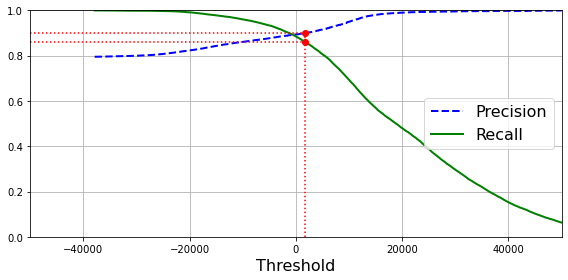

In [29]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) # Not shown in the book
    plt.xlabel("Threshold", fontsize=16)        # Not shown
    plt.grid(True)                              # Not shown
    plt.axis([-50000, 50000, 0, 1])             # Not shown



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(8, 4))                                                                  # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 0.9], "r:")                 # Not shown
plt.plot([-50000, threshold_90_precision], [0.9, 0.9], "r:")                                # Not shown
plt.plot([-50000, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")# Not shown
plt.plot([threshold_90_precision], [0.9], "ro")                                             # Not shown
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             # Not shown
save_fig("precision_recall_vs_threshold_plot")                                              # Not shown
plt.show()

In [30]:
(y_train_pred == (y_scores > 0)).all()

True

Saving figure precision_vs_recall_plot


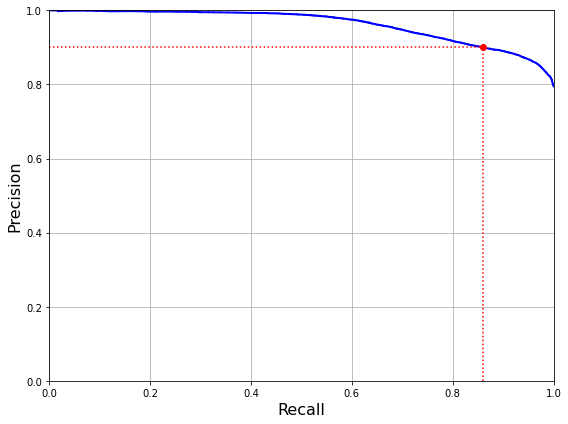

In [31]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.plot([recall_90_precision, recall_90_precision], [0., 0.9], "r:")
plt.plot([0.0, recall_90_precision], [0.9, 0.9], "r:")
plt.plot([recall_90_precision], [0.9], "ro")
save_fig("precision_vs_recall_plot")
plt.show()

In [32]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [33]:
threshold_90_precision

1795.1900738384466

In [34]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [35]:
recall_score(y_train_Metal, y_train_pred_90)

0.8597841726618705

# ROC Curve

In [36]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_Metal, y_scores)

Saving figure roc_curve_plot


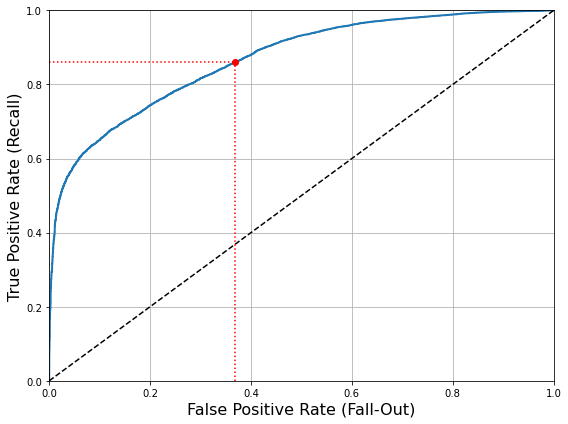

In [37]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)                                            # Not shown

plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
save_fig("roc_curve_plot")                                    # Not shown
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_Metal, y_scores)

0.8676545338729017

# Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_Metal, cv=3,
                                    method="predict_proba")

In [40]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_Metal,y_scores_forest)

Saving figure roc_curve_comparison_plot


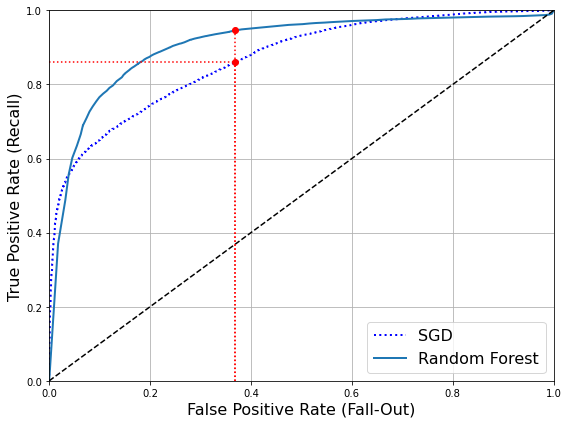

In [41]:
recall_for_forest = tpr_forest[np.argmax(fpr_forest >= fpr_90)]

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")
plt.plot([fpr_90], [recall_90_precision], "ro")
plt.plot([fpr_90, fpr_90], [0., recall_for_forest], "r:")
plt.plot([fpr_90], [recall_for_forest], "ro")
plt.grid(True)
plt.legend(loc="lower right", fontsize=16)
save_fig("roc_curve_comparison_plot")
plt.show()

In [42]:
roc_auc_score(y_train_Metal, y_scores_forest)

0.9065385591526779

In [43]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_Metal, cv=3)
precision_score(y_train_Metal, y_train_pred_forest)

0.920201984282209

In [44]:
recall_score(y_train_Metal, y_train_pred_forest)

0.9308273381294964

# Testset

In [45]:
df_ts=pd.DataFrame(ts)
df_ts.shape

(132520, 146)

In [46]:
feature_range = list(range(145))
X_ts=df_ts.iloc[:, feature_range]
some_digit=X_ts.iloc[0]